# Minor Project : Tarun Raj Singh (B21CS076) and Aryan Himmatlal Prajapati (B21EE012)

<h3> (PROJECT 2) TOPIC : CREDIT CARD FRAUD DETECTION </h3>

In [6]:
# Importing Necessary Libraries and Modules

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import lightgbm
from sklearn.metrics import confusion_matrix as cm 
from sklearn.metrics import f1_score as f1
from sklearn.metrics import recall_score as rs 
from sklearn.metrics import  precision_score as ps 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score as acc
from tabulate import tabulate


In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Importing and Reading dataset into Pandas DataFrame

df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [9]:
# Checking Number of Instances in each class 

num0 = df['Class'].value_counts()
print("Number of Instances of Class 0 ( not fraud ) : ",num0[0])
print("Number of Instances of Class 1 ( fraud )     : ",num0[1])
print("_______________________________________________________")
print("Highly Imbalanced by ratio : " ,num0[0]/num0[1])


Number of Instances of Class 0 ( not fraud ) :  284315
Number of Instances of Class 1 ( fraud )     :  492
_______________________________________________________
Highly Imbalanced by ratio :  577.8760162601626


<h5> Hence we can see that the dataset is highly Imbalanced as Instances in Class 0 >>>> Instances in Class 1 </h5>

Text(0.5, 250000, 'Extremely High instances')

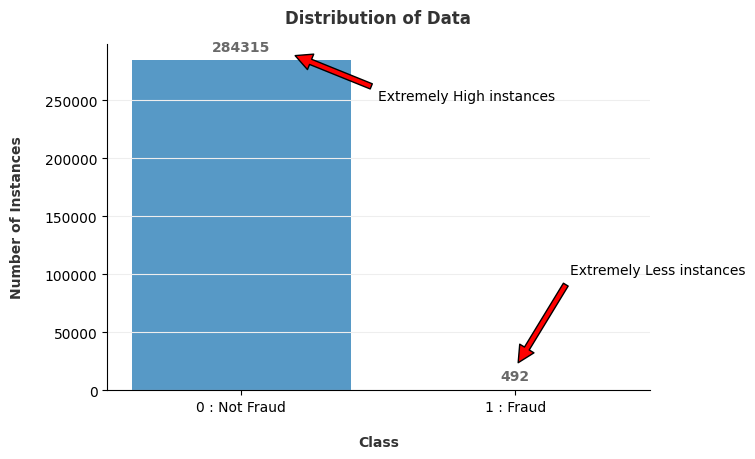

In [10]:
# Visualizing the Distribution of data by number of Instances in each class using a Bar plot

x = ["0 : Not Fraud","1 : Fraud"]
fig, ax = plt.subplots(figsize=(7,4.50))
bars = ax.bar([0,1],num0,tick_label=x,alpha=0.75)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.grid(True, color='#EEEEEE')

bar_color = bars[0].get_facecolor()
for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 8000,
      round(bar.get_height(), 1),
      horizontalalignment='center',
      color="dimgrey",
      weight='bold'
  )

ax.set_xlabel('Class', labelpad=15, color='#333333',weight='bold')
ax.set_ylabel('Number of Instances', labelpad=15, color='#333333',weight='bold')
ax.set_title('Distribution of Data', pad=15, color='#333333',
             weight='bold')
low_point  = (1,20000)
high_point = (0.18,290000)
plt.annotate('Extremely Less instances', xy=low_point, xytext=(1.2,100000),
             arrowprops=dict(facecolor='red', shrink=0.05))
plt.annotate('Extremely High instances', xy=high_point, xytext=(0.5, 250000),
            arrowprops=dict(facecolor='red', shrink=0.05))

# If we apply any classifier Algorithm on this highly imbalanced dataset :

<h3> Using Adaboost </h3>

In [11]:
# Seperating out Features and labels
x_data = df.drop(columns=['Class'])
y_data = df['Class']

In [12]:
# Splitting into training and testing features and labels
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,random_state = 100,stratify = y_data)

In [13]:
# Creating Adaboost Object

Ada_clf = AdaBoostClassifier(random_state=42)
Ada_clf.fit(x_train,y_train)

AdaBoostClassifier(random_state=42)

In [14]:
# Predicting the test data outcomes
y_preds = Ada_clf.predict(x_test)

In [15]:
# Checking the Classification report 
class_names = ["0 : Not Fraud","1 : Fraud"]
print(classification_report(y_true=y_test,y_pred=y_preds,target_names=class_names))

               precision    recall  f1-score   support

0 : Not Fraud       1.00      1.00      1.00     71079
    1 : Fraud       0.78      0.68      0.73       123

     accuracy                           1.00     71202
    macro avg       0.89      0.84      0.86     71202
 weighted avg       1.00      1.00      1.00     71202



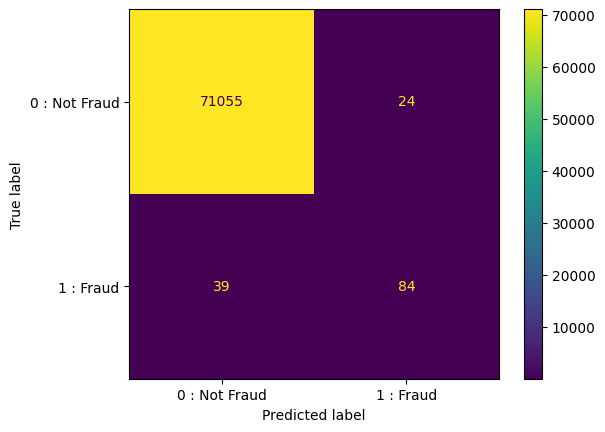

In [16]:
# Plotting the Confusion Matrix for Imbalanced Data and AdaBoost
cf_mat_ada_imb = cm(y_test,y_preds,labels=[0,1])
disp_ada_imb = ConfusionMatrixDisplay(confusion_matrix=cf_mat_ada_imb,display_labels=["0 : Not Fraud","1 : Fraud"])
disp_ada_imb.plot()

<h5> From the confusion matrix it is clear that the model is very poorly performing for the Class 1 (fraud) instances , due to the highly Imbalance in the data . </h5>

<h3> Using XGBoost </h3>

In [17]:
# Creating XGBboost Object 

XGB_clf = XGBClassifier(random_state=42)
XGB_clf.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [18]:
# Predicting the test data outcomes
y_preds_xgb = XGB_clf.predict(x_test)

In [19]:
# Checking the Classification report 
print(classification_report(y_true=y_test,y_pred=y_preds_xgb,target_names=class_names))

               precision    recall  f1-score   support

0 : Not Fraud       1.00      1.00      1.00     71079
    1 : Fraud       0.97      0.76      0.85       123

     accuracy                           1.00     71202
    macro avg       0.98      0.88      0.93     71202
 weighted avg       1.00      1.00      1.00     71202



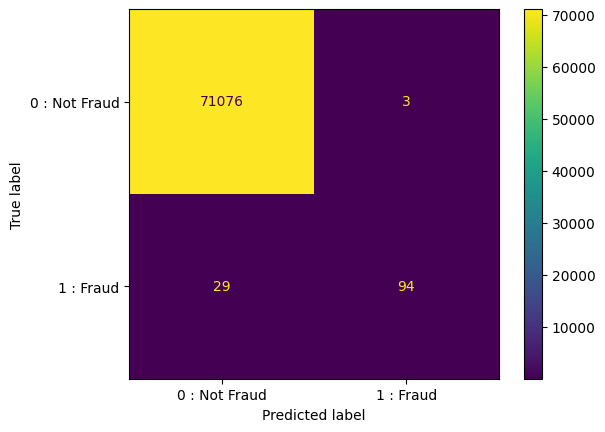

In [20]:
# Plotting the Confusion Matrix for Imbalanced Data and XGBoost
cf_mat_xgb_imb = cm(y_test,y_preds_xgb,labels=[0,1])
disp_xgb_imb = ConfusionMatrixDisplay(confusion_matrix=cf_mat_xgb_imb,display_labels=["0 : Not Fraud","1 : Fraud"])
disp_xgb_imb.plot()


<h5> Here also we can clearly see from the confusion matrix that the model is very poor in classifying the class 1 (Fraud) Instances </h5>

<h3> Using LGBM </h3>

In [21]:
# Making LGBM data (Imbalanced)
params = {'num_leaves':50}
train_data_imb = lightgbm.Dataset(x_train,label=y_train)
test_data_imb = lightgbm.Dataset(x_test,label=y_test)

In [22]:
# Trainign LGBM model on Imbalanced data
LGBM_imb = lightgbm.train(params,train_data_imb)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018350 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 213605, number of used features: 30
[LightGBM] [Info] Start training from score 0.001727


In [23]:
# Predicting the results for Testing set
LGBM_preds = LGBM_imb.predict(x_test)

In [24]:
# Converting Predictions to the nearest class labels
lgbm_preds_imb = []
for i in LGBM_preds:
    if i <= 0.5:
        lgbm_preds_imb.append(0)
    else:
        lgbm_preds_imb.append(1)

In [25]:
# Checking the classfication report
print(classification_report(y_true=y_test,y_pred=lgbm_preds_imb,target_names=class_names))

               precision    recall  f1-score   support

0 : Not Fraud       1.00      1.00      1.00     71079
    1 : Fraud       0.96      0.78      0.86       123

     accuracy                           1.00     71202
    macro avg       0.98      0.89      0.93     71202
 weighted avg       1.00      1.00      1.00     71202



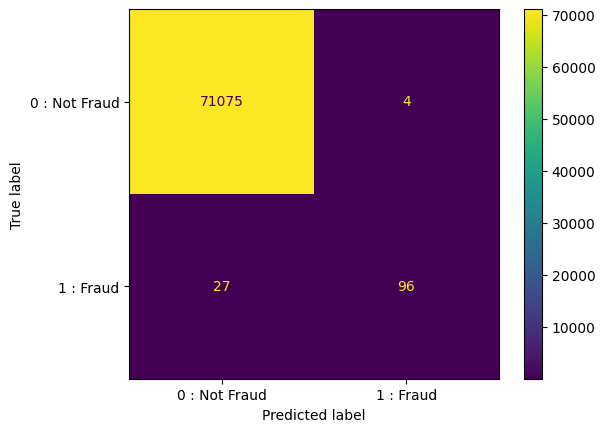

In [26]:
# Plotting the Confusion Matrix for Imbalanced Data and LGBM
cf_mat_lgbm_imb = cm(y_test,lgbm_preds_imb,labels=[0,1])
disp_lgbm_imb = ConfusionMatrixDisplay(confusion_matrix=cf_mat_lgbm_imb,display_labels=["0 : Not Fraud","1 : Fraud"])
disp_lgbm_imb.plot()

<h5> As we can see that the overall Accuracy of all these models using the Imbalanced data is close to 1 , still the Precision , Recall and F1 score for class 1 is not good enough , this is due to the highly imbalanced data which is biased towards predicting class 0 , To improve this , we can apply various Imbalance handling algorithms.</h5>

# Applying Imbalance handling methods using Adaboost : 

<h2> 1. UnderSampling </h2>

In [27]:
# Seperating Instances of each class
cl_0_new1 = df[df['Class'] == 0]
cl_1_new1 = df[df['Class'] == 1]

# UnderSampling the Majority class (i.e , class 0)
cl_0_new1 = cl_0_new1.sample(cl_1_new1.shape[0])

In [28]:
"""Concatinating the undersampled class 0 and original class 1 data and creating new Undersampled dataset having
 equal number of instances in each class (i.e , 492 instances for both classes)"""

new_df1 = pd.concat([cl_0_new1,cl_1_new1],axis=0)

In [29]:
# Splitting Data into Training and Testing sets
x_data1 = new_df1.drop(columns=['Class'])
y_data1 = new_df1['Class']

x_train1,x_test1,y_train1,y_test1  = train_test_split(x_data1,y_data1,random_state=42,stratify=y_data1)

In [30]:
# Applying Adaboost on this Undersampled Dataset
Ada_under_1 = AdaBoostClassifier(random_state=100)
Ada_under_1.fit(x_train1,y_train1)

AdaBoostClassifier(random_state=100)

In [31]:
# Predicting the test Instances
y_preds_under1 = Ada_under_1.predict(x_test1)

In [32]:
# Classification report 
print(classification_report(y_true=y_test1,y_pred=y_preds_under1,target_names=class_names))

               precision    recall  f1-score   support

0 : Not Fraud       0.94      0.96      0.95       123
    1 : Fraud       0.96      0.93      0.95       123

     accuracy                           0.95       246
    macro avg       0.95      0.95      0.95       246
 weighted avg       0.95      0.95      0.95       246



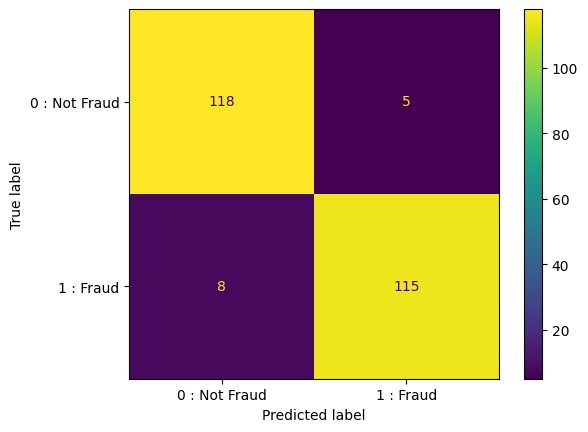

In [33]:
# Plotting the Confusion Matrix for UnderSampling Data and Adaboost
cf_mat_under = cm(y_test1,y_preds_under1,labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cf_mat_under,display_labels=["0 : Not Fraud","1 : Fraud"])
disp.plot()

<h2> 2. OverSampling </h2> 

In [34]:
# Seperating Instances of each class
cl_0_new2 = df[df['Class'] == 0]
cl_1_new2 = df[df['Class'] == 1]

# OverSampling the Minority class (i.e , class 1)
cl_new_1 = cl_1_new2.sample(cl_0_new2.shape[0],replace=True)

In [35]:
"""Concatinating the oversampled class 1 and original class 0 data and creating new Oversampled dataset having
   equal number of instances in each class (i.e , 284315 instances for both classes)"""
new_df2 = pd.concat([cl_0_new2,cl_new_1],axis=0)

In [36]:
# Splitting Data into Training and Testing sets
x_data2 = new_df2.drop(columns=['Class'])
y_data2 = new_df2['Class']

x_train2,x_test2,y_train2,y_test2  = train_test_split(x_data2,y_data2,random_state=42,stratify=y_data2)

In [37]:
# Applying Adaboost on this Oversampled Dataset
Ada_over_1 = AdaBoostClassifier(random_state=100)
Ada_over_1.fit(x_train2,y_train2)

AdaBoostClassifier(random_state=100)

In [38]:
# Predicting the test Instances
y_preds_over1 = Ada_over_1.predict(x_test2)

In [39]:
# Classification report 
print(classification_report(y_true=y_test2,y_pred=y_preds_over1,target_names=class_names))

               precision    recall  f1-score   support

0 : Not Fraud       0.97      0.98      0.97     71079
    1 : Fraud       0.98      0.97      0.97     71079

     accuracy                           0.97    142158
    macro avg       0.97      0.97      0.97    142158
 weighted avg       0.97      0.97      0.97    142158



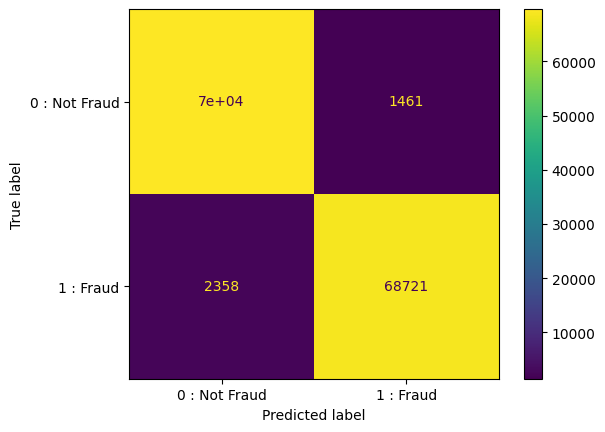

In [40]:
# Plotting the Confusion Matrix for OverSampled Data and Adaboost
cf_mat_over = cm(y_test2,y_preds_over1,labels=[0,1])
disp_over = ConfusionMatrixDisplay(confusion_matrix=cf_mat_over,display_labels=["0 : Not Fraud","1 : Fraud"])
disp_over.plot()

<h2> 3. Synthetic Minority Oversampling Technique (SMOTE) </h2>

In [41]:
# Creating Sythetic data for the Minority Class (i.e , Class 1) and making instances in both classes = 284315
smote_over = SMOTE(sampling_strategy='minority')
x_syn , y_syn = smote_over.fit_resample(x_data,y_data)

In [42]:
# Splitting data into training and testing sets
x_train_syn , x_test_syn , y_train_syn , y_test_syn = train_test_split(x_syn,y_syn,random_state=42,stratify=y_syn)

In [43]:
# Applying Adaboost on this Synthetic sampled Dataset

Ada_syn_over = AdaBoostClassifier(random_state=100)
Ada_syn_over.fit(x_train_syn,y_train_syn)

AdaBoostClassifier(random_state=100)

In [44]:
# Predicting the test Instances
y_preds_syn = Ada_syn_over.predict(x_test_syn)

In [45]:
# Classification report 
print(classification_report(y_true=y_test_syn,y_pred=y_preds_syn,target_names=class_names))

               precision    recall  f1-score   support

0 : Not Fraud       0.98      0.99      0.98     71079
    1 : Fraud       0.99      0.98      0.98     71079

     accuracy                           0.98    142158
    macro avg       0.98      0.98      0.98    142158
 weighted avg       0.98      0.98      0.98    142158



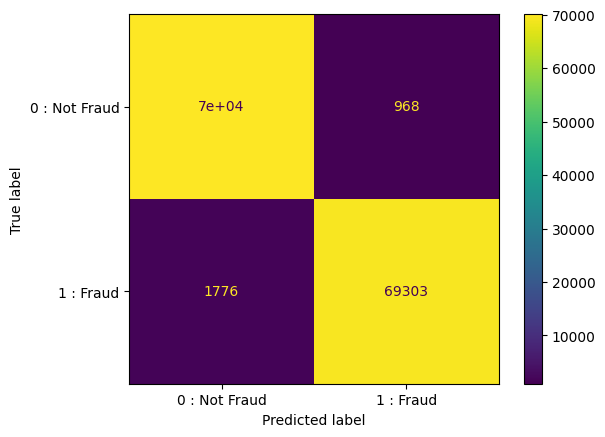

In [46]:
# Plotting the Confusion Matrix for Synthetic Sampled Data and Adaboost
cf_mat_syn = cm(y_test_syn,y_preds_syn,labels=[0,1])
disp_syn = ConfusionMatrixDisplay(confusion_matrix=cf_mat_syn,display_labels=["0 : Not Fraud","1 : Fraud"])
disp_syn.plot()

# Applying Imbalance handling methods using XGBoost : 

<h2>1. Under Sampling</h2>

In [47]:
# Applying XGBoost on this Undersampled Dataset
XGB_under = XGBClassifier(random_state = 2)
XGB_under.fit(x_train1,y_train1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=2, ...)

In [48]:
# Predicting the test Instances
XGB_under_preds = XGB_under.predict(x_test1)

In [49]:
# Classification report 
print(classification_report(y_true=y_test1,y_pred=XGB_under_preds,target_names=class_names))

               precision    recall  f1-score   support

0 : Not Fraud       0.95      0.98      0.96       123
    1 : Fraud       0.98      0.94      0.96       123

     accuracy                           0.96       246
    macro avg       0.96      0.96      0.96       246
 weighted avg       0.96      0.96      0.96       246



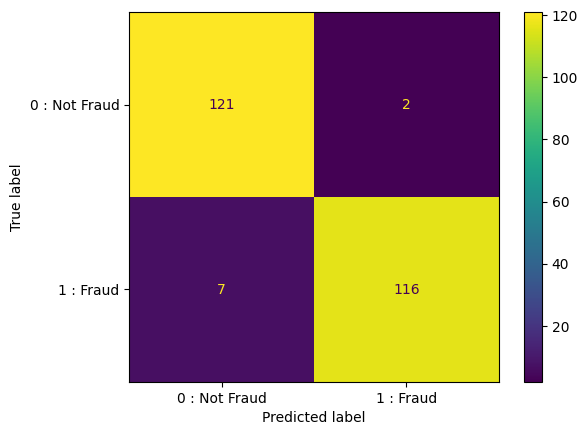

In [50]:
# Plotting the Confusion Matrix for Synthetic Sampled Data and Adaboost
cf_mat_under2 = cm(y_test1,XGB_under_preds,labels=[0,1])
disp_under2 = ConfusionMatrixDisplay(confusion_matrix=cf_mat_under2,display_labels=["0 : Not Fraud","1 : Fraud"])
disp_under2.plot()

<h2>2. OverSampling </h2>

In [51]:
# Applying XGBoost on this Oversampled Dataset
XGB_over = XGBClassifier(random_state = 42)
XGB_over.fit(x_train2,y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [52]:
# Predicting the test Instances
XGB_over_preds = XGB_over.predict(x_test2)

In [53]:
# Classification report 
print(classification_report(y_true=y_test2,y_pred=XGB_over_preds,target_names=class_names))

               precision    recall  f1-score   support

0 : Not Fraud       1.00      1.00      1.00     71079
    1 : Fraud       1.00      1.00      1.00     71079

     accuracy                           1.00    142158
    macro avg       1.00      1.00      1.00    142158
 weighted avg       1.00      1.00      1.00    142158



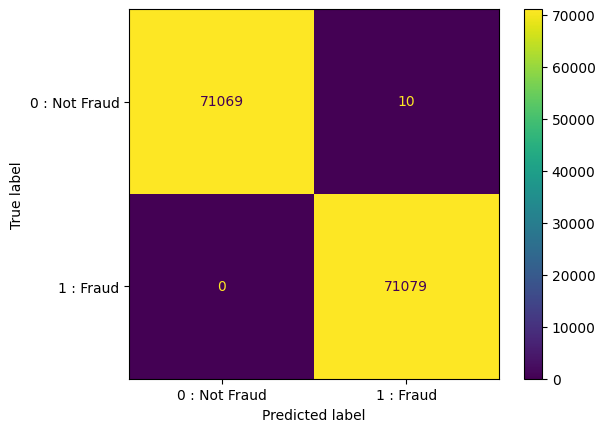

In [54]:
# Plotting the Confusion Matrix for OverSampled Data and XGBoost
cf_mat_over2 = cm(y_test2,XGB_over_preds,labels=[0,1])
disp_over2 = ConfusionMatrixDisplay(confusion_matrix=cf_mat_over2,display_labels=["0 : Not Fraud","1 : Fraud"])
disp_over2.plot()

In [55]:
cnt = 0
cnt2 = 0
for i in range(len(XGB_over_preds)):
    if (XGB_over_preds[i] == 1 and np.array(y_test2)[i] == 0):
        cnt+=1
    if (XGB_over_preds[i] == 0 and np.array(y_test2)[i] == 1):
        cnt2+=1

In [56]:
print("Not Fraud Instances Predicted as Fraud (Out of 71,079)   : ",cnt)
print("Fraud Instances Predicted as Not Fraud (Out of 71,079)   : ",cnt2)
print("_________________________________________________________________")
print("")
print("Total Misclassified Instances (Out of 1,42,198)          : ", cnt+cnt2)
print("_________________________________________________________________")

Not Fraud Instances Predicted as Fraud (Out of 71,079)   :  10
Fraud Instances Predicted as Not Fraud (Out of 71,079)   :  0
_________________________________________________________________

Total Misclassified Instances (Out of 1,42,198)          :  10
_________________________________________________________________


<h2> 3. Synthetic Minority Oversampling Technique (SMOTE) </h2>

In [57]:
# Applying XGBoost on this Synthetic sampled Dataset

XGB_smote = XGBClassifier(random_state = 2)
XGB_smote.fit(x_train_syn,y_train_syn)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=2, ...)

In [58]:
# Predicting the test Instances
XGB_syn_preds = XGB_smote.predict(x_test_syn)

In [59]:
# Classification report
print(classification_report(y_true=y_test_syn,y_pred=XGB_syn_preds,target_names=class_names))

               precision    recall  f1-score   support

0 : Not Fraud       1.00      1.00      1.00     71079
    1 : Fraud       1.00      1.00      1.00     71079

     accuracy                           1.00    142158
    macro avg       1.00      1.00      1.00    142158
 weighted avg       1.00      1.00      1.00    142158



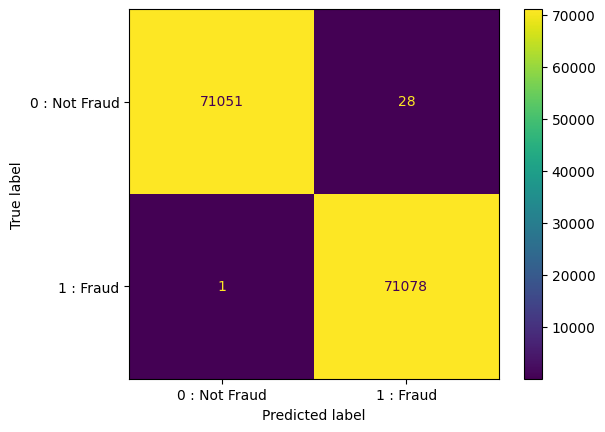

In [60]:
# Plotting the Confusion Matrix for Synthetic Sampled Data and XGBoost
cf_mat_syn2 = cm(y_test_syn,XGB_syn_preds,labels=[0,1])
disp_syn2 = ConfusionMatrixDisplay(confusion_matrix=cf_mat_syn2,display_labels=["0 : Not Fraud","1 : Fraud"])
disp_syn2.plot()

In [61]:
cnt_xg_2 = 0
cnt2_xg_2 = 0
for i in range(len(XGB_syn_preds)):
    if (XGB_syn_preds[i] == 1 and np.array(y_test_syn)[i] == 0):
        cnt_xg_2+=1
    if (XGB_syn_preds[i] == 0 and np.array(y_test_syn)[i] == 1):
        cnt2_xg_2+=1

In [62]:
print("Not Fraud Instances Predicted as Fraud (Out of 71,079)   : ",cnt_xg_2)
print("Fraud Instances Predicted as Not Fraud (Out of 71,079)   : ",cnt2_xg_2)
print("_________________________________________________________________")
print("")
print("Total Misclassified Instances (Out of 1,42,198)          : ", cnt_xg_2+cnt2_xg_2)
print("_________________________________________________________________")

Not Fraud Instances Predicted as Fraud (Out of 71,079)   :  28
Fraud Instances Predicted as Not Fraud (Out of 71,079)   :  1
_________________________________________________________________

Total Misclassified Instances (Out of 1,42,198)          :  29
_________________________________________________________________


# Applying Imbalance handling methods using LGBM : 

<h2>1. Under Sampling</h2>

In [63]:
# Making LGBM data (Under Sampled)
params = {'num_leaves':50}
train_data_under = lightgbm.Dataset(x_train1,label=y_train1)
test_data_under = lightgbm.Dataset(x_test1,label=y_test1)

In [64]:
# Training LGBM model on this under sampled Data
LGBM_under = lightgbm.train(params,train_data_under)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7384
[LightGBM] [Info] Number of data points in the train set: 738, number of used features: 30
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [65]:
# Making Predictions of test instances 
LGBM_under_preds = LGBM_under.predict(x_test1)

In [66]:
# Converting Decimal values to nearest class
lgbm_preds_under_fin = []
for i in LGBM_under_preds:
    if i <= 0.5:
        lgbm_preds_under_fin.append(0)
    else:
        lgbm_preds_under_fin.append(1)

In [67]:
# Classification report
print(classification_report(y_true=y_test1,y_pred=lgbm_preds_under_fin,target_names=class_names))

               precision    recall  f1-score   support

0 : Not Fraud       0.95      0.98      0.96       123
    1 : Fraud       0.98      0.94      0.96       123

     accuracy                           0.96       246
    macro avg       0.96      0.96      0.96       246
 weighted avg       0.96      0.96      0.96       246



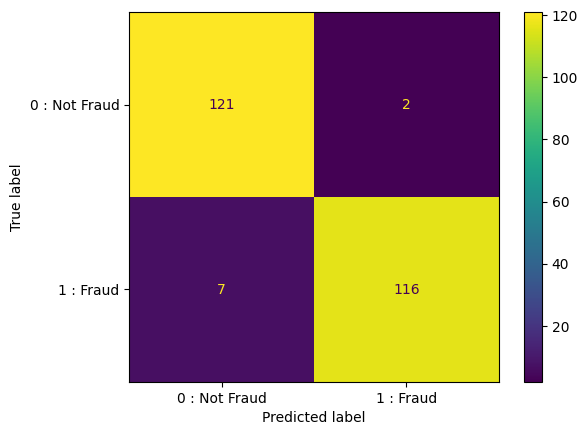

In [68]:
# Plotting the Confusion Matrix for underSampled Data and LGBM 
cf_mat_under3 = cm(y_test1,lgbm_preds_under_fin,labels=[0,1])
disp_under3 = ConfusionMatrixDisplay(confusion_matrix=cf_mat_under3,display_labels=["0 : Not Fraud","1 : Fraud"])
disp_under3.plot()

<h2>2. OverSampling </h2>

In [69]:
# Making LGBM data (Over Sampled)
params = {'num_leaves':50}
train_data_over = lightgbm.Dataset(x_train2,label=y_train2)
test_data_over = lightgbm.Dataset(x_test2,label=y_test2)

In [70]:
# Training LGBM model on this Over sampled Data
LGBM_over = lightgbm.train(params,train_data_over)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.044776 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7649
[LightGBM] [Info] Number of data points in the train set: 426472, number of used features: 30
[LightGBM] [Info] Start training from score 0.500000


In [71]:
# Making Predictions of test instances 
LGBM_over_preds = LGBM_over.predict(x_test2)

In [72]:
# Converting Decimal values to nearest class
lgbm_preds_over_fin = []
for i in LGBM_over_preds:
    if i <= 0.5:
        lgbm_preds_over_fin.append(0)
    else:
        lgbm_preds_over_fin.append(1)

In [73]:
# Classification report
print(classification_report(y_true=y_test2,y_pred=lgbm_preds_over_fin,target_names=class_names))

               precision    recall  f1-score   support

0 : Not Fraud       1.00      1.00      1.00     71079
    1 : Fraud       1.00      1.00      1.00     71079

     accuracy                           1.00    142158
    macro avg       1.00      1.00      1.00    142158
 weighted avg       1.00      1.00      1.00    142158



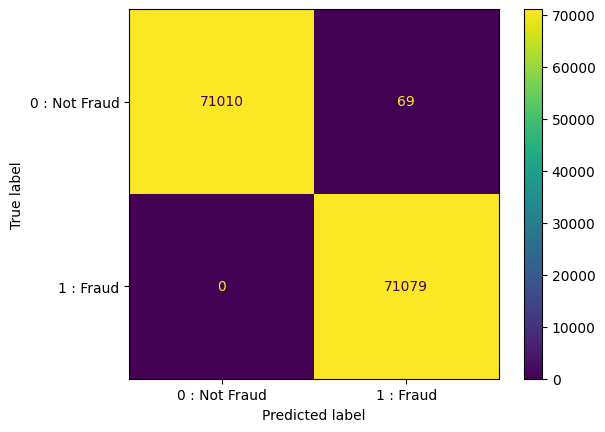

In [74]:
# Plotting the Confusion Matrix for OverSampled Data and LGBM 
cf_mat_over3 = cm(y_test2,lgbm_preds_over_fin,labels=[0,1])
disp_over3 = ConfusionMatrixDisplay(confusion_matrix=cf_mat_over3,display_labels=["0 : Not Fraud","1 : Fraud"])
disp_over3.plot()

In [75]:
cnt_lgbm = 0
cnt2_lgbm = 0
for i in range(len(lgbm_preds_over_fin)):
    if (lgbm_preds_over_fin[i] == 1 and np.array(y_test2)[i] == 0):
        cnt_lgbm+=1
    if (lgbm_preds_over_fin[i] == 0 and np.array(y_test2)[i] == 1):
        cnt2_lgbm+=1

In [76]:
print("Not Fraud Instances Predicted as Fraud (Out of 71,079)   : ",cnt_lgbm)
print("Fraud Instances Predicted as Not Fraud (Out of 71,079)   : ",cnt2_lgbm)
print("_________________________________________________________________")
print("")
print("Total Misclassified Instances (Out of 1,42,198)          : ", cnt_lgbm+cnt2_lgbm)
print("_________________________________________________________________")

Not Fraud Instances Predicted as Fraud (Out of 71,079)   :  69
Fraud Instances Predicted as Not Fraud (Out of 71,079)   :  0
_________________________________________________________________

Total Misclassified Instances (Out of 1,42,198)          :  69
_________________________________________________________________


<h2> 3. Synthetic Minority Oversampling Technique (SMOTE) </h2>

In [77]:
# Making LGBM data (Synthetic Sampled using SMOTE)
params = {'num_leaves':50}
train_data_syn = lightgbm.Dataset(x_train_syn,label=y_train_syn)
test_data_syn = lightgbm.Dataset(x_test_syn,label=y_test_syn)

In [78]:
# Training LGBM model on this Synthetic sampled Data
LGBM_syn = lightgbm.train(params,train_data_syn)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027519 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 426472, number of used features: 30
[LightGBM] [Info] Start training from score 0.500000


In [79]:
# Making Predictions of test instances 
LGBM_syn_preds = LGBM_syn.predict(x_test_syn)

In [80]:
# Converting Decimal values to nearest class
lgbm_preds_syn_fin = []
for i in LGBM_syn_preds:
    if i <= 0.5:
        lgbm_preds_syn_fin.append(0)
    else:
        lgbm_preds_syn_fin.append(1)

In [81]:
# Classification report
print(classification_report(y_true=y_test_syn,y_pred=lgbm_preds_syn_fin,target_names=class_names))

               precision    recall  f1-score   support

0 : Not Fraud       1.00      1.00      1.00     71079
    1 : Fraud       1.00      1.00      1.00     71079

     accuracy                           1.00    142158
    macro avg       1.00      1.00      1.00    142158
 weighted avg       1.00      1.00      1.00    142158



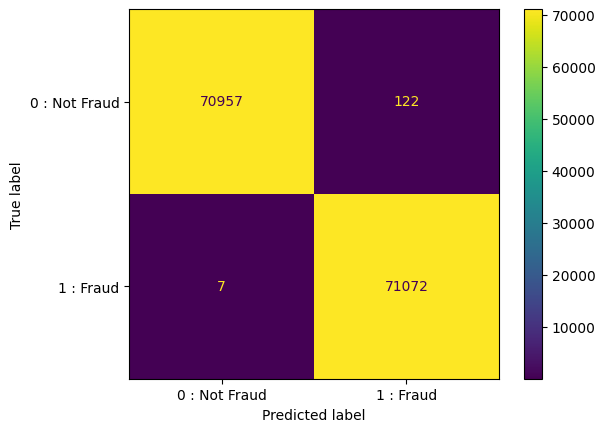

In [82]:
# Plotting the Confusion Matrix for Synthetic Sampled Data and LGBM 
cf_mat_syn3 = cm(y_test_syn,lgbm_preds_syn_fin,labels=[0,1])
disp_syn3 = ConfusionMatrixDisplay(confusion_matrix=cf_mat_syn3,display_labels=["0 : Not Fraud","1 : Fraud"])
disp_syn3.plot()

In [83]:
cnt_lgbm2 = 0
cnt2_lgbm2 = 0
for i in range(len(lgbm_preds_syn_fin)):
    if (lgbm_preds_syn_fin[i] == 1 and np.array(y_test_syn)[i] == 0):
        cnt_lgbm2+=1
    if (lgbm_preds_syn_fin[i] == 0 and np.array(y_test_syn)[i] == 1):
        cnt2_lgbm2+=1

In [84]:
print("Not Fraud Instances Predicted as Fraud (Out of 71,079)   : ",cnt_lgbm2)
print("Fraud Instances Predicted as Not Fraud (Out of 71,079)   : ",cnt2_lgbm2)
print("_________________________________________________________________")
print("")
print("Total Misclassified Instances (Out of 1,42,198)          : ", cnt_lgbm2+cnt2_lgbm2)
print("_________________________________________________________________")

Not Fraud Instances Predicted as Fraud (Out of 71,079)   :  122
Fraud Instances Predicted as Not Fraud (Out of 71,079)   :  7
_________________________________________________________________

Total Misclassified Instances (Out of 1,42,198)          :  129
_________________________________________________________________


# Plots for Performance on different model selections

In [85]:
#####    For AdaBoost     #####

f1_s_ada = []
ps_s_ada = []
rs_s_ada = []
acc_s_ada = []

f1_s_ada = [f1(y_test,y_preds),f1(y_test1,y_preds_under1),f1(y_test2,y_preds_over1),f1(y_test_syn,y_preds_syn)]
ps_s_ada = [ps(y_test,y_preds),ps(y_test1,y_preds_under1),ps(y_test2,y_preds_over1),ps(y_test_syn,y_preds_syn)]
rs_s_ada = [rs(y_test,y_preds),rs(y_test1,y_preds_under1),rs(y_test2,y_preds_over1),rs(y_test_syn,y_preds_syn)]
acc_s_ada = [acc(y_test,y_preds),acc(y_test1,y_preds_under1),acc(y_test2,y_preds_over1),acc(y_test_syn,y_preds_syn)]

f1_s_ada = np.round(np.array(f1_s_ada), 3)
ps_s_ada = np.round(np.array(ps_s_ada), 3)
rs_s_ada = np.round(np.array(rs_s_ada), 3)
acc_s_ada = np.round(np.array(acc_s_ada), 3)


In [86]:
#####    For XGBoost     #####

f1_s_xgb = []
ps_s_xgb = []
rs_s_xgb = []
acc_s_xgb = []

f1_s_xgb = [f1(y_test,y_preds_xgb),f1(y_test1,XGB_under_preds),f1(y_test2,XGB_over_preds),f1(y_test_syn,XGB_syn_preds)]
ps_s_xgb = [ps(y_test,y_preds_xgb),ps(y_test1,XGB_under_preds),ps(y_test2,XGB_over_preds),ps(y_test_syn,XGB_syn_preds)]
rs_s_xgb = [rs(y_test,y_preds_xgb),rs(y_test1,XGB_under_preds),rs(y_test2,XGB_over_preds),rs(y_test_syn,XGB_syn_preds)]
acc_s_xgb = [acc(y_test,y_preds_xgb),acc(y_test1,XGB_under_preds),acc(y_test2,XGB_over_preds),acc(y_test_syn,XGB_syn_preds)]

f1_s_xgb = np.round(np.array(f1_s_xgb), 3)
ps_s_xgb = np.round(np.array(ps_s_xgb), 3)
rs_s_xgb = np.round(np.array(rs_s_xgb), 3)
acc_s_xgb = np.round(np.array(acc_s_xgb), 3)


In [87]:
#####    For LGBM     #####

f1_s_lgbm = []
ps_s_lgbm = []
rs_s_lgbm = []
acc_s_lgbm = []

f1_s_lgbm = [f1(y_test,lgbm_preds_imb),f1(y_test1,lgbm_preds_under_fin),f1(y_test2,lgbm_preds_over_fin),f1(y_test_syn,lgbm_preds_syn_fin)]
ps_s_lgbm = [ps(y_test,lgbm_preds_imb),ps(y_test1,lgbm_preds_under_fin),ps(y_test2,lgbm_preds_over_fin),ps(y_test_syn,lgbm_preds_syn_fin)]
rs_s_lgbm = [rs(y_test,lgbm_preds_imb),rs(y_test1,lgbm_preds_under_fin),rs(y_test2,lgbm_preds_over_fin),rs(y_test_syn,lgbm_preds_syn_fin)]
acc_s_lgbm = [acc(y_test,lgbm_preds_imb),acc(y_test1,lgbm_preds_under_fin),acc(y_test2,lgbm_preds_over_fin),acc(y_test_syn,lgbm_preds_syn_fin)]

f1_s_lgbm = np.round(np.array(f1_s_lgbm), 3)
ps_s_lgbm = np.round(np.array(ps_s_lgbm), 3)
rs_s_lgbm = np.round(np.array(rs_s_lgbm), 3)
acc_s_lgbm = np.round(np.array(acc_s_lgbm), 3)


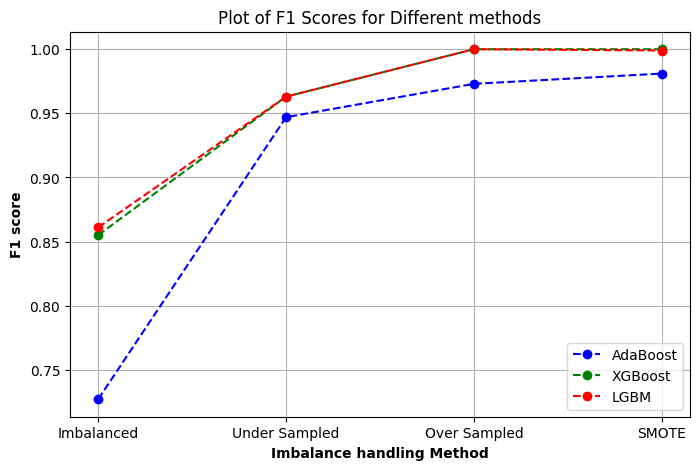

In [88]:
# Plot for F1 scores 

plt.figure(figsize = (8,5))
plt.plot(["Imbalanced","Under Sampled","Over Sampled","SMOTE"],f1_s_ada,marker='o', linestyle='--',label = "AdaBoost",color='b')
plt.plot(["Imbalanced","Under Sampled","Over Sampled","SMOTE"],f1_s_xgb,marker='o', linestyle='--',label = "XGBoost",color = 'g')
plt.plot(["Imbalanced","Under Sampled","Over Sampled","SMOTE"],f1_s_lgbm,marker='o', linestyle='--',label = "LGBM",color = 'r')
plt.grid()
plt.title("Plot of F1 Scores for Different methods")
plt.xlabel("Imbalance handling Method",weight = 'bold')
plt.ylabel("F1 score",weight = 'bold')
plt.legend(loc='lower right')
plt.show()

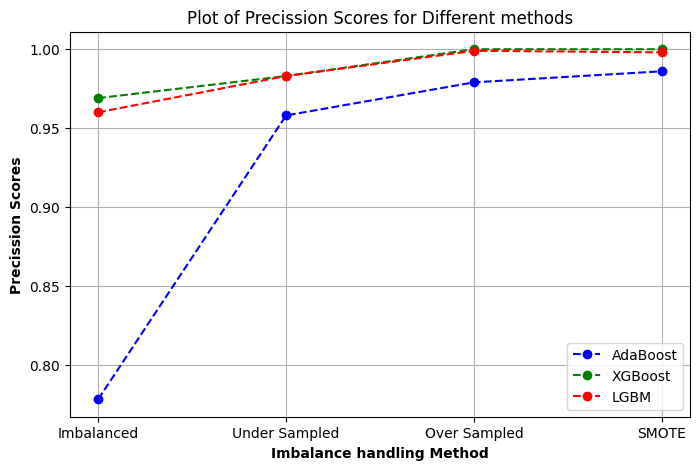

In [89]:
# Plot for Precision scores 

plt.figure(figsize = (8,5))
plt.plot(["Imbalanced","Under Sampled","Over Sampled","SMOTE"],ps_s_ada,marker='o', linestyle='--',label = "AdaBoost",color='b')
plt.plot(["Imbalanced","Under Sampled","Over Sampled","SMOTE"],ps_s_xgb,marker='o', linestyle='--',label = "XGBoost",color = 'g')
plt.plot(["Imbalanced","Under Sampled","Over Sampled","SMOTE"],ps_s_lgbm,marker='o', linestyle='--',label = "LGBM",color = 'r')
plt.grid()
plt.title("Plot of Precission Scores for Different methods")
plt.xlabel("Imbalance handling Method",weight = 'bold')
plt.ylabel("Precission Scores",weight = 'bold')
plt.legend(loc='lower right')
plt.show()

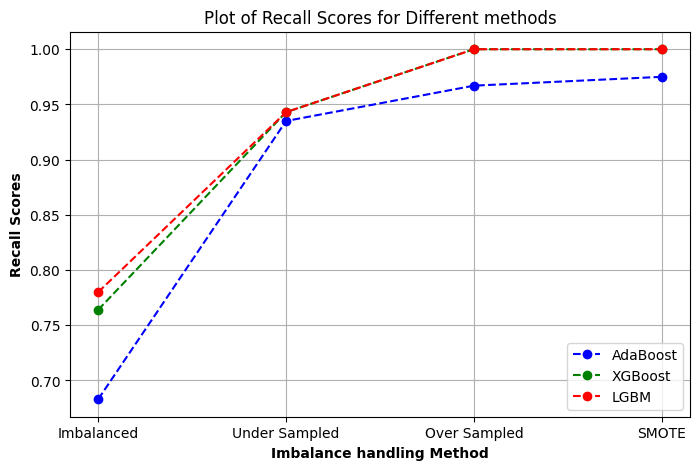

In [90]:
# Plot for Recall scores 

plt.figure(figsize = (8,5))
plt.plot(["Imbalanced","Under Sampled","Over Sampled","SMOTE"],rs_s_ada,marker='o', linestyle='--',label = "AdaBoost",color='b')
plt.plot(["Imbalanced","Under Sampled","Over Sampled","SMOTE"],rs_s_xgb,marker='o', linestyle='--',label = "XGBoost",color = 'g')
plt.plot(["Imbalanced","Under Sampled","Over Sampled","SMOTE"],rs_s_lgbm,marker='o', linestyle='--',label = "LGBM",color = 'r')
plt.grid()
plt.title("Plot of Recall Scores for Different methods")
plt.xlabel("Imbalance handling Method",weight = 'bold')
plt.ylabel("Recall Scores",weight = 'bold')
plt.legend(loc='lower right')
plt.show()

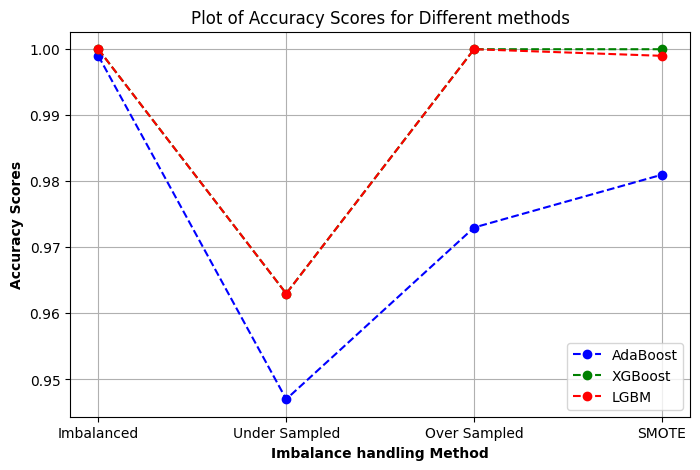

In [91]:
# Plot for Accuracy scores 

plt.figure(figsize = (8,5))
plt.plot(["Imbalanced","Under Sampled","Over Sampled","SMOTE"],acc_s_ada,marker='o', linestyle='--',label = "AdaBoost",color='b')
plt.plot(["Imbalanced","Under Sampled","Over Sampled","SMOTE"],acc_s_xgb,marker='o', linestyle='--',label = "XGBoost",color = 'g')
plt.plot(["Imbalanced","Under Sampled","Over Sampled","SMOTE"],acc_s_lgbm,marker='o', linestyle='--',label = "LGBM",color = 'r')
plt.grid()
plt.title("Plot of Accuracy Scores for Different methods")
plt.xlabel("Imbalance handling Method",weight = 'bold')
plt.ylabel("Accuracy Scores",weight = 'bold')
plt.legend(loc='lower right')
plt.show()

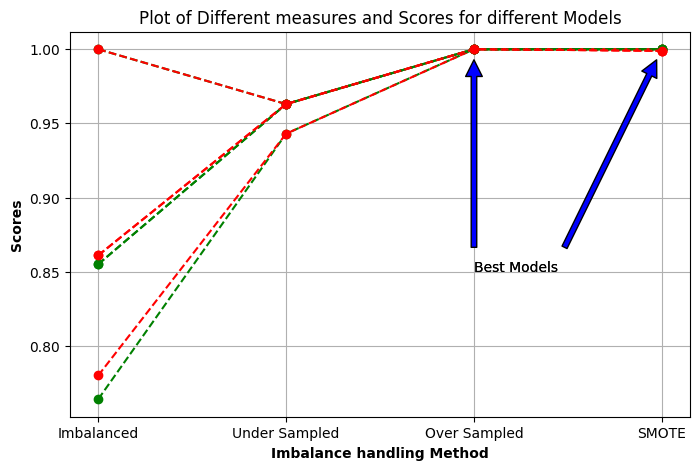

In [92]:
#Best model grapgh 

plt.figure(figsize = (8,5))
# plt.plot(["Imbalanced","Under Sampled","Over Sampled","SMOTE"],acc_s_ada,marker='o', linestyle='--',label = "AdaBoost",color='b')
plt.plot(["Imbalanced","Under Sampled","Over Sampled","SMOTE"],acc_s_xgb,marker='o', linestyle='--',label = "XGBoost",color = 'g')
plt.plot(["Imbalanced","Under Sampled","Over Sampled","SMOTE"],acc_s_lgbm,marker='o', linestyle='--',label = "LGBM",color = 'r')
# plt.plot(["Imbalanced","Under Sampled","Over Sampled","SMOTE"],rs_s_ada,marker='o', linestyle='--',label = "AdaBoost",color='b')
plt.plot(["Imbalanced","Under Sampled","Over Sampled","SMOTE"],rs_s_xgb,marker='o', linestyle='--',label = "XGBoost",color = 'g')
plt.plot(["Imbalanced","Under Sampled","Over Sampled","SMOTE"],rs_s_lgbm,marker='o', linestyle='--',label = "LGBM",color = 'r')
# plt.plot(["Imbalanced","Under Sampled","Over Sampled","SMOTE"],f1_s_ada,marker='o', linestyle='--',label = "AdaBoost",color='b')
plt.plot(["Imbalanced","Under Sampled","Over Sampled","SMOTE"],f1_s_xgb,marker='o', linestyle='--',label = "XGBoost",color = 'g')
plt.plot(["Imbalanced","Under Sampled","Over Sampled","SMOTE"],f1_s_lgbm,marker='o', linestyle='--',label = "LGBM",color = 'r')
# plt.plot(["Imbalanced","Under Sampled","Over Sampled","SMOTE"],f1_s_ada,marker='o', linestyle='--',label = "AdaBoost",color='b')
plt.plot(["Imbalanced","Under Sampled","Over Sampled","SMOTE"],f1_s_xgb,marker='o', linestyle='--',label = "XGBoost",color = 'g')
plt.plot(["Imbalanced","Under Sampled","Over Sampled","SMOTE"],f1_s_lgbm,marker='o', linestyle='--',label = "LGBM",color = 'r')
plt.grid()
plt.title("Plot of Different measures and Scores for different Models")
plt.xlabel("Imbalance handling Method",weight = 'bold')
plt.ylabel("Scores",weight = 'bold')
low_point  = ("Over Sampled",1)
high_point = ("SMOTE",1)
plt.annotate('Best Models', xy=low_point, xytext=("Over Sampled",0.85),
             arrowprops=dict(facecolor='blue', shrink=0.05))
plt.annotate('Best Models', xy=high_point, xytext=("Over Sampled",0.85),
            arrowprops=dict(facecolor='blue', shrink=0.05))
# plt.legend(loc='lower right')
plt.show()

<h3>Finally Lets Try to predict the actual Data using our best model and check it's score on the actual data. </h3>

In [93]:
# From the evaluation steps , we got XGBoost and Oversampling model as the best trained model.
best_model = XGB_over

y_actual = y_data
y_best_predicted = best_model.predict(x_data)

In [94]:
# Checking the Classification report 
class_names = ["0 : Not Fraud","1 : Fraud"]
print(classification_report(y_true=y_actual,y_pred=y_best_predicted,target_names=class_names))

               precision    recall  f1-score   support

0 : Not Fraud       1.00      1.00      1.00    284315
    1 : Fraud       0.98      1.00      0.99       492

     accuracy                           1.00    284807
    macro avg       0.99      1.00      0.99    284807
 weighted avg       1.00      1.00      1.00    284807



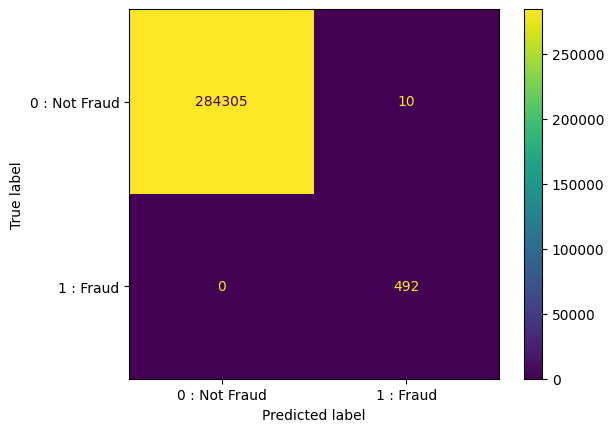

In [95]:
# Plotting the Confusion Matrix for Imbalanced Data and AdaBoost
act_data_cm = cm(y_actual,y_best_predicted,labels=[0,1])
disp_act_ = ConfusionMatrixDisplay(confusion_matrix=act_data_cm,display_labels=["0 : Not Fraud","1 : Fraud"])
disp_act_.plot()

In [96]:
cnt_best_model_actual_data = 0
cnt2_best_model_actual_data = 0
for i in range(len(y_best_predicted)):
    if (y_best_predicted[i] == 1 and np.array(y_actual)[i] == 0):
        cnt_best_model_actual_data+=1
    if (y_best_predicted[i] == 0 and np.array(y_actual)[i] == 1):
        cnt2_best_model_actual_data+=1

In [98]:
print("Not Fraud Instances Predicted as Fraud (Out of 2,84,315)   : ",cnt_best_model_actual_data)
print("Fraud Instances Predicted as Not Fraud (Out of 492)   : ",cnt2_best_model_actual_data)
print("_________________________________________________________________")
print("")
print("Total Misclassified Instances (Out of 2,84,807)          : ", cnt_best_model_actual_data+cnt2_best_model_actual_data)
print("_________________________________________________________________")

Not Fraud Instances Predicted as Fraud (Out of 2,84,315)   :  10
Fraud Instances Predicted as Not Fraud (Out of 492)   :  0
_________________________________________________________________

Total Misclassified Instances (Out of 2,84,807)          :  10
_________________________________________________________________


<h4> Our best trained model is correctly classifying all the fraud instances of the actual data , hence  the model is not at all biased towards any of the classes , this can be seen from the fact that it only missclassified 10 points from 2,84,315 non fraud instances as fraud , but did not classified any fraud instances as non fraud. So, every fraud instance is caught with an accuracy of 100% and every non fraud instance is detected corectly with an accuracy of 99.996%</h4>